In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Load the Earthquake data_set
data_set = pd.read_csv('https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv')
data_set

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-09-29T11:19:28.710Z,37.368832,-118.390831,8.480000,1.88,md,10.0,160.00,0.162500,0.0700,...,2023-09-29T11:21:04.890Z,"0 km NE of Bishop, CA",earthquake,1.310000,4.450000,0.170,9.0,automatic,nc,nc
1,2023-09-29T11:08:19.803Z,64.124000,-151.910300,6.900000,1.60,ml,NaN,NaN,NaN,0.8800,...,2023-09-29T11:10:19.768Z,"33 km NE of Lake Minchumina, Alaska",earthquake,NaN,0.300000,NaN,NaN,automatic,ak,ak
2,2023-09-29T10:59:16.150Z,33.271333,-116.778500,11.590000,0.87,ml,28.0,52.00,0.038950,0.1600,...,2023-09-29T11:02:43.246Z,"4 km NNW of Lake Henshaw, CA",earthquake,0.240000,0.690000,0.101,24.0,automatic,ci,ci
3,2023-09-29T10:53:11.461Z,61.604300,-149.792900,43.400000,1.10,ml,NaN,NaN,NaN,0.3200,...,2023-09-29T10:55:07.249Z,"3 km SSE of Houston, Alaska",earthquake,NaN,0.800000,NaN,NaN,automatic,ak,ak
4,2023-09-29T10:49:45.475Z,57.638300,-151.105900,27.500000,2.90,ml,NaN,NaN,NaN,0.4800,...,2023-09-29T11:19:15.040Z,"70 km E of Chiniak, Alaska",earthquake,NaN,3.000000,NaN,NaN,automatic,ak,ak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9653,2023-08-30T12:03:20.600Z,35.354500,-97.944833,6.200000,1.04,ml,34.0,59.00,0.043192,0.4300,...,2023-08-31T13:52:39.329Z,"4 km S of Union City, Oklahoma",earthquake,NaN,0.800000,0.160,16.0,reviewed,ok,ok
9654,2023-08-30T11:59:10.001Z,61.542700,-149.923700,38.600000,1.10,ml,NaN,NaN,NaN,0.5100,...,2023-09-12T21:19:37.599Z,"2 km NE of Big Lake, Alaska",earthquake,NaN,0.700000,NaN,NaN,reviewed,ak,ak
9655,2023-08-30T11:53:55.012Z,65.501100,-152.595500,13.100000,1.10,ml,NaN,NaN,NaN,0.8000,...,2023-09-12T21:19:37.368Z,"43 km NNW of Tanana, Alaska",earthquake,NaN,0.200000,NaN,NaN,reviewed,ak,ak
9656,2023-08-30T11:40:38.537Z,32.001675,-103.825485,8.136792,2.70,ml,21.0,54.00,0.020520,0.1000,...,2023-09-12T11:45:56.040Z,"33 km SE of Malaga, New Mexico",earthquake,0.694435,0.778922,0.100,41.0,reviewed,tx,tx


In [3]:
## First 5 rows data_set
data_set.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-09-29T11:19:28.710Z,37.368832,-118.390831,8.48,1.88,md,10.0,160.0,0.16250,0.07,...,2023-09-29T11:21:04.890Z,"0 km NE of Bishop, CA",earthquake,1.31,4.45,0.170,9.0,automatic,nc,nc
1,2023-09-29T11:08:19.803Z,64.124000,-151.910300,6.90,1.60,ml,NaN,NaN,NaN,0.88,...,2023-09-29T11:10:19.768Z,"33 km NE of Lake Minchumina, Alaska",earthquake,NaN,0.30,NaN,NaN,automatic,ak,ak
2,2023-09-29T10:59:16.150Z,33.271333,-116.778500,11.59,0.87,ml,28.0,52.0,0.03895,0.16,...,2023-09-29T11:02:43.246Z,"4 km NNW of Lake Henshaw, CA",earthquake,0.24,0.69,0.101,24.0,automatic,ci,ci
3,2023-09-29T10:53:11.461Z,61.604300,-149.792900,43.40,1.10,ml,NaN,NaN,NaN,0.32,...,2023-09-29T10:55:07.249Z,"3 km SSE of Houston, Alaska",earthquake,NaN,0.80,NaN,NaN,automatic,ak,ak
4,2023-09-29T10:49:45.475Z,57.638300,-151.105900,27.50,2.90,ml,NaN,NaN,NaN,0.48,...,2023-09-29T11:19:15.040Z,"70 km E of Chiniak, Alaska",earthquake,NaN,3.00,NaN,NaN,automatic,ak,ak


In [4]:
## Last 5 rows data_set
data_set.tail()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
9653,2023-08-30T12:03:20.600Z,35.354500,-97.944833,6.200000,1.04,ml,34.0,59.00,0.043192,0.4300,...,2023-08-31T13:52:39.329Z,"4 km S of Union City, Oklahoma",earthquake,NaN,0.800000,0.16,16.0,reviewed,ok,ok
9654,2023-08-30T11:59:10.001Z,61.542700,-149.923700,38.600000,1.10,ml,NaN,NaN,NaN,0.5100,...,2023-09-12T21:19:37.599Z,"2 km NE of Big Lake, Alaska",earthquake,NaN,0.700000,NaN,NaN,reviewed,ak,ak
9655,2023-08-30T11:53:55.012Z,65.501100,-152.595500,13.100000,1.10,ml,NaN,NaN,NaN,0.8000,...,2023-09-12T21:19:37.368Z,"43 km NNW of Tanana, Alaska",earthquake,NaN,0.200000,NaN,NaN,reviewed,ak,ak
9656,2023-08-30T11:40:38.537Z,32.001675,-103.825485,8.136792,2.70,ml,21.0,54.00,0.020520,0.1000,...,2023-09-12T11:45:56.040Z,"33 km SE of Malaga, New Mexico",earthquake,0.694435,0.778922,0.10,41.0,reviewed,tx,tx
9657,2023-08-30T11:25:14.787Z,39.553500,-116.766600,0.000000,1.50,ml,3.0,282.51,1.043000,0.0932,...,2023-08-30T20:03:21.933Z,"26 km ENE of Austin, Nevada",earthquake,NaN,0.000000,0.16,2.0,reviewed,nn,nn


In [5]:
## Information about the data_set
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9658 entries, 0 to 9657
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             9658 non-null   object 
 1   latitude         9658 non-null   float64
 2   longitude        9658 non-null   float64
 3   depth            9658 non-null   float64
 4   mag              9657 non-null   float64
 5   magType          9657 non-null   object 
 6   nst              7174 non-null   float64
 7   gap              7174 non-null   float64
 8   dmin             5766 non-null   float64
 9   rms              9658 non-null   float64
 10  net              9658 non-null   object 
 11  id               9658 non-null   object 
 12  updated          9658 non-null   object 
 13  place            9658 non-null   object 
 14  type             9658 non-null   object 
 15  horizontalError  6550 non-null   float64
 16  depthError       9658 non-null   float64
 17  magError      

In [6]:
## Check for missing values
data_set.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   1
magType               1
nst                2484
gap                2484
dmin               3892
rms                   0
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    3108
depthError            0
magError           2516
magNst             2497
status                0
locationSource        0
magSource             0
dtype: int64

In [7]:
## Replaceing empty string in the 'mag' column with NaN values
data_set['mag']=data_set['mag'].replace({'':np.nan})

## Dataset is performing replacement operations.
data_set.replace(to_replace={col: {'':np.nan, None:np.nan} for col in data_set.columns}, inplace=True)

In [8]:
data_set.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   1
magType               1
nst                2484
gap                2484
dmin               3892
rms                   0
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    3108
depthError            0
magError           2516
magNst             2497
status                0
locationSource        0
magSource             0
dtype: int64

In [9]:
## Replace missing values with median
data_set['mag'] = data_set['mag'].fillna(data_set['mag'].median())
data_set['nst'] = data_set['nst'].fillna(data_set['nst'].median())
data_set['gap'] = data_set['gap'].fillna(data_set['gap'].median())
data_set['dmin'] = data_set['dmin'].fillna(data_set['dmin'].median())
data_set['horizontalError'] = data_set['horizontalError'].fillna(data_set['horizontalError'].median())
data_set['magError'] = data_set['magError'].fillna(data_set['magError'].median())
data_set['magNst'] = data_set['magNst'].fillna(data_set['magNst'].median())

In [10]:
## New dataset
New_data_set= data_set.head(9527)
New_data_set

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-09-29T11:19:28.710Z,37.368832,-118.390831,8.480,1.88,md,10.0,160.0,0.162500,0.07,...,2023-09-29T11:21:04.890Z,"0 km NE of Bishop, CA",earthquake,1.31,4.450,0.170000,9.0,automatic,nc,nc
1,2023-09-29T11:08:19.803Z,64.124000,-151.910300,6.900,1.60,ml,16.0,99.0,0.063865,0.88,...,2023-09-29T11:10:19.768Z,"33 km NE of Lake Minchumina, Alaska",earthquake,0.46,0.300,0.165252,10.0,automatic,ak,ak
2,2023-09-29T10:59:16.150Z,33.271333,-116.778500,11.590,0.87,ml,28.0,52.0,0.038950,0.16,...,2023-09-29T11:02:43.246Z,"4 km NNW of Lake Henshaw, CA",earthquake,0.24,0.690,0.101000,24.0,automatic,ci,ci
3,2023-09-29T10:53:11.461Z,61.604300,-149.792900,43.400,1.10,ml,16.0,99.0,0.063865,0.32,...,2023-09-29T10:55:07.249Z,"3 km SSE of Houston, Alaska",earthquake,0.46,0.800,0.165252,10.0,automatic,ak,ak
4,2023-09-29T10:49:45.475Z,57.638300,-151.105900,27.500,2.90,ml,16.0,99.0,0.063865,0.48,...,2023-09-29T11:19:15.040Z,"70 km E of Chiniak, Alaska",earthquake,0.46,3.000,0.165252,10.0,automatic,ak,ak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9522,2023-08-30T19:04:22.229Z,54.709400,-161.197400,18.600,2.10,ml,16.0,99.0,0.063865,0.36,...,2023-09-13T23:14:47.869Z,"81 km ESE of King Cove, Alaska",earthquake,0.46,0.900,0.165252,10.0,reviewed,ak,ak
9523,2023-08-30T18:59:46.050Z,34.987500,-118.181333,-0.900,1.34,ml,27.0,53.0,0.115200,0.29,...,2023-09-12T18:06:39.604Z,"7 km S of Mojave, CA",quarry blast,0.57,31.610,0.231000,17.0,reviewed,ci,ci
9524,2023-08-30T18:59:24.817Z,54.816600,-161.212400,46.578,5.10,mww,166.0,131.0,0.503000,1.09,...,2023-09-27T21:03:49.795Z,"73 km SW of Sand Point, Alaska",earthquake,4.51,4.479,0.047000,44.0,reviewed,us,us
9525,2023-08-30T18:56:19.670Z,57.076667,-135.749000,6.610,0.76,ml,5.0,219.0,0.063865,0.13,...,2023-09-08T18:07:36.320Z,"25 km W of Sitka, Alaska",earthquake,1.06,0.630,0.245645,7.0,reviewed,av,av


In [11]:
## Verfy the missing values.
## "magType" still have missing data but this type of data is Text based.
New_data_set.isnull().sum()

time               0
latitude           0
longitude          0
depth              0
mag                0
magType            1
nst                0
gap                0
dmin               0
rms                0
net                0
id                 0
updated            0
place              0
type               0
horizontalError    0
depthError         0
magError           0
magNst             0
status             0
locationSource     0
magSource          0
dtype: int64

In [12]:
## Basic Statistics of data_set
## The magnitude of earthquakes varies between -1.12 to 6.8, the mean magnitude is low (1.57) which means majority of the earthquakes are low magnitude. 
New_data_set.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,9527.000000,9527.000000,9527.000000,9527.000000,9527.000000,9527.000000,9527.000000,9527.000000,9527.000000,9527.000000,9527.000000,9527.000000
mean,41.311528,-116.776978,24.839838,1.573980,21.093839,112.567948,0.392560,0.296442,1.328398,2.099427,0.207023,14.980686
std,19.189699,65.197001,55.000736,1.210716,19.685055,57.412719,1.680602,0.268539,3.260134,4.932183,0.289279,24.022827
min,-65.899300,-179.994000,-3.430000,-1.120000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.048750,-152.290033,2.970000,0.800000,12.000000,77.000000,0.049225,0.100000,0.330000,0.410000,0.130000,7.000000
50%,38.841332,-122.792167,8.300000,1.360000,16.000000,99.000000,0.063865,0.180000,0.460000,0.700000,0.165252,10.000000
75%,58.189367,-116.444917,19.030000,2.000000,22.000000,129.000000,0.082270,0.470000,0.660000,1.550000,0.206886,14.000000
max,79.568100,179.967500,669.982000,6.800000,393.000000,357.000000,39.455000,2.820000,176.932676,89.300000,5.240000,600.000000


In [13]:
##Dataset represents the aggregated data for each unique 'time' value in the original data set.
New_data_set.groupby(['time']).sum(numeric_only=True)

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
time,,,,,,,,,,,,
2023-08-30T18:50:14.041Z,63.200300,-149.061200,8.600,1.10,16.0,99.0,0.063865,0.68,0.46,0.200,0.165252,10.0
2023-08-30T18:56:19.670Z,57.076667,-135.749000,6.610,0.76,5.0,219.0,0.063865,0.13,1.06,0.630,0.245645,7.0
2023-08-30T18:59:24.817Z,54.816600,-161.212400,46.578,5.10,166.0,131.0,0.503000,1.09,4.51,4.479,0.047000,44.0
2023-08-30T18:59:46.050Z,34.987500,-118.181333,-0.900,1.34,27.0,53.0,0.115200,0.29,0.57,31.610,0.231000,17.0
2023-08-30T19:04:22.229Z,54.709400,-161.197400,18.600,2.10,16.0,99.0,0.063865,0.36,0.46,0.900,0.165252,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-29T10:49:45.475Z,57.638300,-151.105900,27.500,2.90,16.0,99.0,0.063865,0.48,0.46,3.000,0.165252,10.0
2023-09-29T10:53:11.461Z,61.604300,-149.792900,43.400,1.10,16.0,99.0,0.063865,0.32,0.46,0.800,0.165252,10.0
2023-09-29T10:59:16.150Z,33.271333,-116.778500,11.590,0.87,28.0,52.0,0.038950,0.16,0.24,0.690,0.101000,24.0


In [14]:
## Location Earthquake
New_data_set.loc[:, 'place'] = New_data_set['place'].astype(str)
New_data_set['place'].value_counts()

place
7 km NW of The Geysers, CA                     126
Alaska Peninsula                               124
Southern Alaska                                123
8 km NW of The Geysers, CA                     101
85 km NNW of Karluk, Alaska                     87
                                              ... 
56 km SE of Nikolski, Alaska                     1
29 km WSW of Tyonek, Alaska                      1
109 km NNW of Finschhafen, Papua New Guinea      1
southern Greece                                  1
22 km SSW of Cantwell, Alaska                    1
Name: count, Length: 5292, dtype: int64

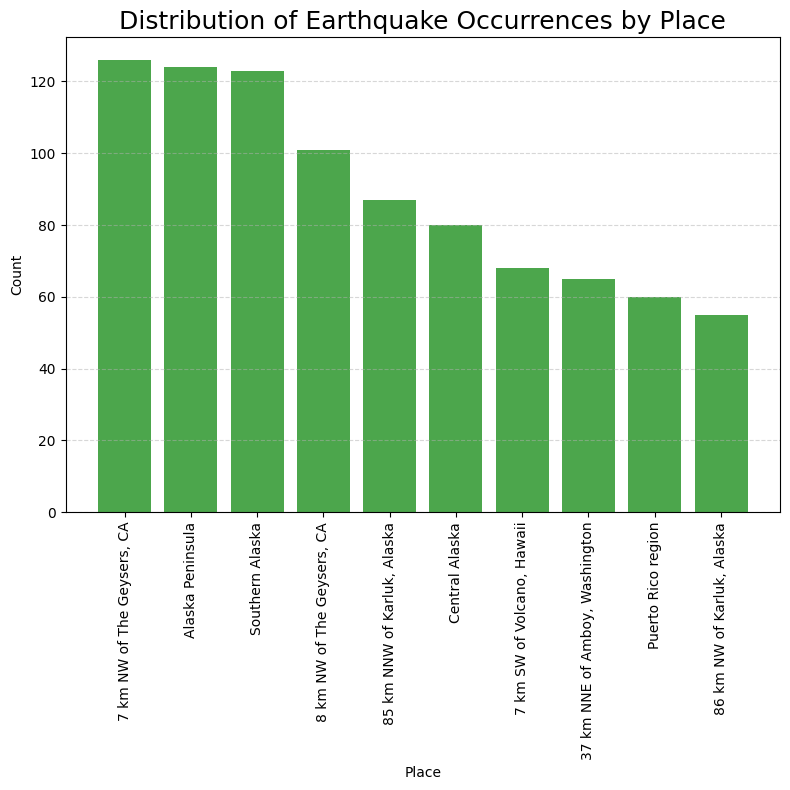

In [15]:
## Bar graph
# Group the data by "place" and count the occurrences
place_counts = New_data_set['place'].value_counts()[:10]
# Create the bar graph
plt.figure(figsize=(8, 8))
plt.bar(place_counts.index, place_counts.values, color='green', alpha=0.7)
plt.title('Distribution of Earthquake Occurrences by Place', fontsize=18, loc="center")
plt.xlabel('Place')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=90)  # Rotate x-axis labels 
plt.tight_layout()
plt.show()

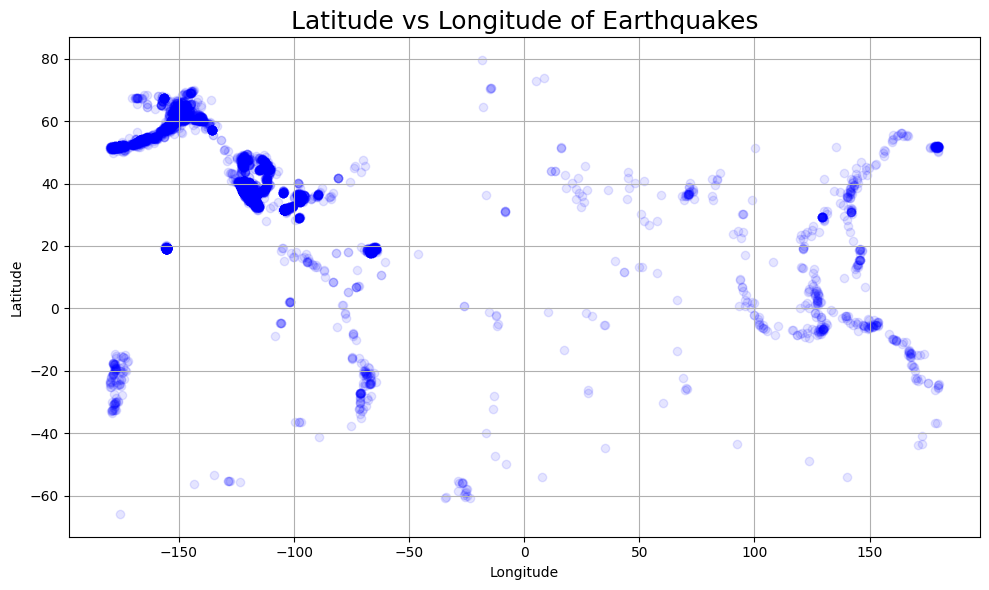

In [16]:
## Scatter Plot 1
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(New_data_set['longitude'], New_data_set['latitude'], c='b', marker='o', alpha = 0.1)
plt.title('Latitude vs Longitude of Earthquakes', fontsize=18, loc="center")  # Set the title
plt.xlabel('Longitude')  # Label for the x-axis
plt.ylabel('Latitude')  # Label for the y-axis
plt.grid(True)  # Add a grid
plt.tight_layout() 
plt.show() # Display the plot

C:\Users\Arani C\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


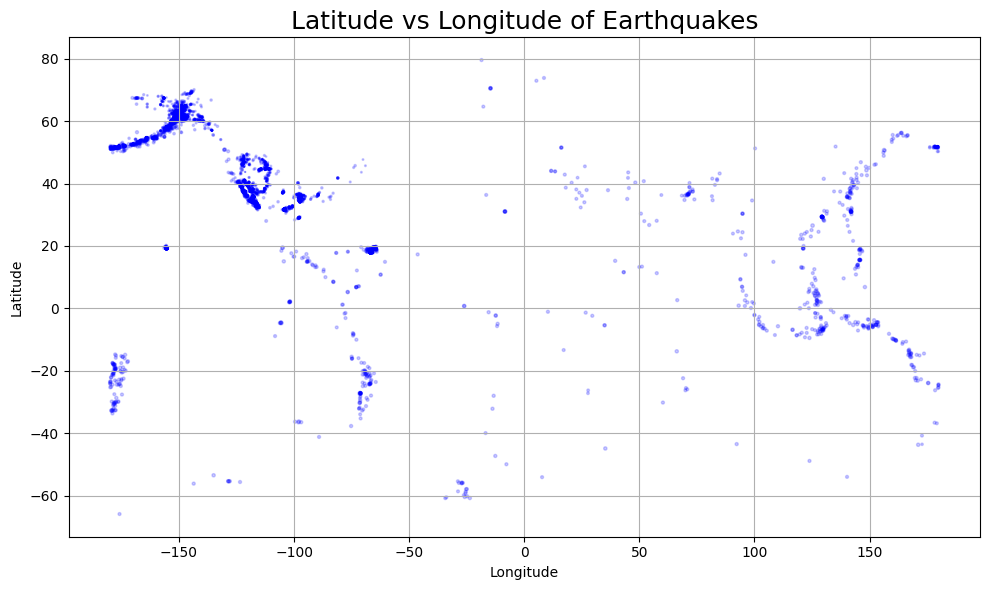

In [17]:
## Scatter Plot 2
##Create a figure and set the figure size
plt.figure(figsize=(10, 6))
##Create the scatter plot
plt.scatter(New_data_set['longitude'], New_data_set['latitude'], c='blue', s=New_data_set["mag"], marker='o', alpha=0.2)
##Set the title and adjust its position
plt.title('Latitude vs Longitude of Earthquakes', fontsize=18, loc="center")
##Label for the x-axis
plt.xlabel('Longitude')
##Label for the y-axis
plt.ylabel('Latitude')
##Enable the grid
plt.grid(True)
##Adjust layout to prevent labels from getting cut off
plt.tight_layout()
##Display the plot
plt.show()

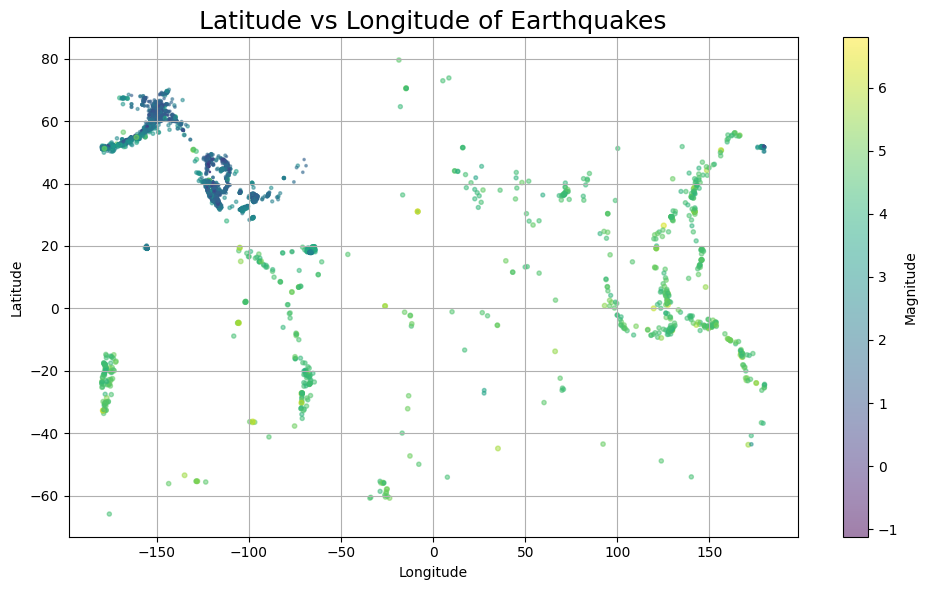

In [18]:
## Scatter Plot 3
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(New_data_set['longitude'], New_data_set['latitude'], s=New_data_set["mag"] * 2, cmap='viridis', c=New_data_set["mag"], marker='o', alpha=0.5)
plt.title('Latitude vs Longitude of Earthquakes', fontsize=18, loc="center")  # Set the title
plt.xlabel('Longitude')  # Label for the x-axis
plt.ylabel('Latitude')  # Label for the y-axis
plt.grid(True)  # Add a grid
plt.colorbar(label='Magnitude')  # Add a colorbar to indicate magnitude
plt.tight_layout()
plt.show()  

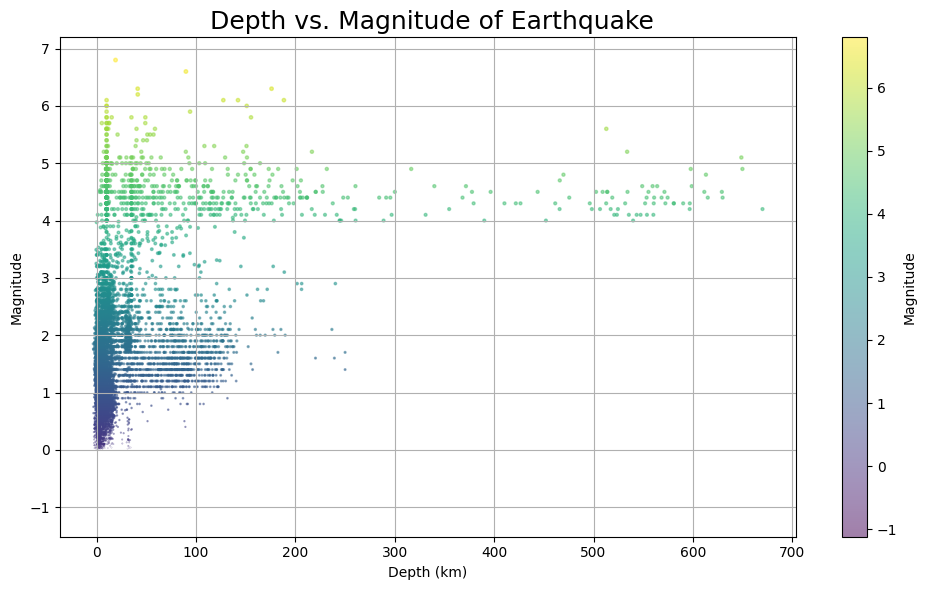

In [19]:
## Scatter Plot 4
plt.figure(figsize=(10, 6)) # Set the figure size
plt.scatter(New_data_set['depth'], New_data_set['mag'], cmap='viridis', c=New_data_set["mag"], s=New_data_set["mag"], alpha = 0.5)
plt.title(' Depth vs. Magnitude of Earthquake', fontsize=18, loc="center") #Set the title
plt.xlabel('Depth (km)')  # Label for the x-axis
plt.ylabel('Magnitude')  # Label for the y-axis
plt.colorbar(label='Magnitude')  
plt.grid(True)  
plt.tight_layout()  
plt.show()  

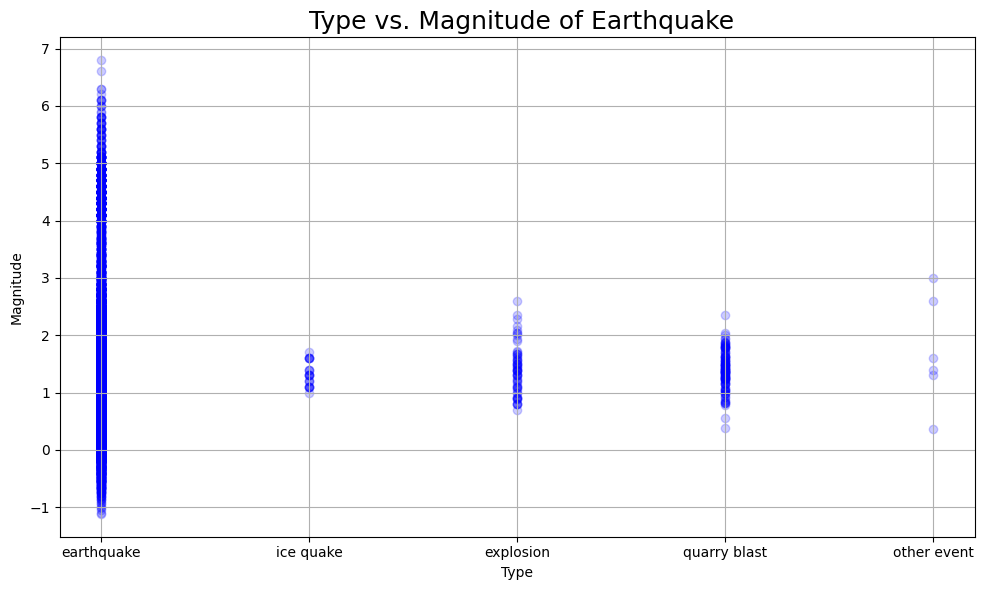

In [20]:
## Scatter Plot 5
plt.figure(figsize=(10, 6))  
plt.scatter(New_data_set['type'], New_data_set['mag'], alpha = 0.2, color='blue')
plt.title(' Type vs. Magnitude of Earthquake', fontsize=18, loc="center") 
plt.xlabel('Type')  
plt.ylabel('Magnitude')  
plt.grid(True)  
plt.tight_layout()  
plt.show()  

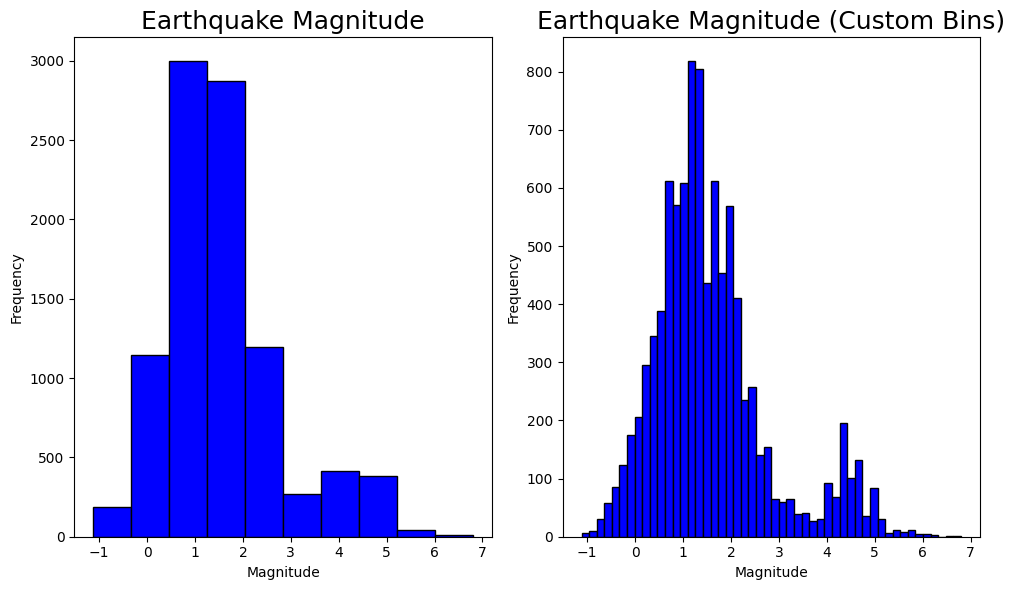

In [21]:
## Histrogram plot 1
## Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# Plot the first histogram on the first subplot (ax[0])
ax[0].hist(New_data_set["mag"], color='blue', edgecolor='black')
ax[0].set_title("Earthquake Magnitude", fontsize=18)
ax[0].set_xlabel("Magnitude")
ax[0].set_ylabel("Frequency")

# Plot the second histogram on the second subplot (ax[1])
ax[1].hist(New_data_set["mag"], bins=50, color='blue', edgecolor='black')
ax[1].set_title("Earthquake Magnitude (Custom Bins)", fontsize=18, loc="center")
ax[1].set_xlabel("Magnitude")
ax[1].set_ylabel("Frequency")
# Adjust the layout for better spacing between subplots
plt.tight_layout()
plt.show()

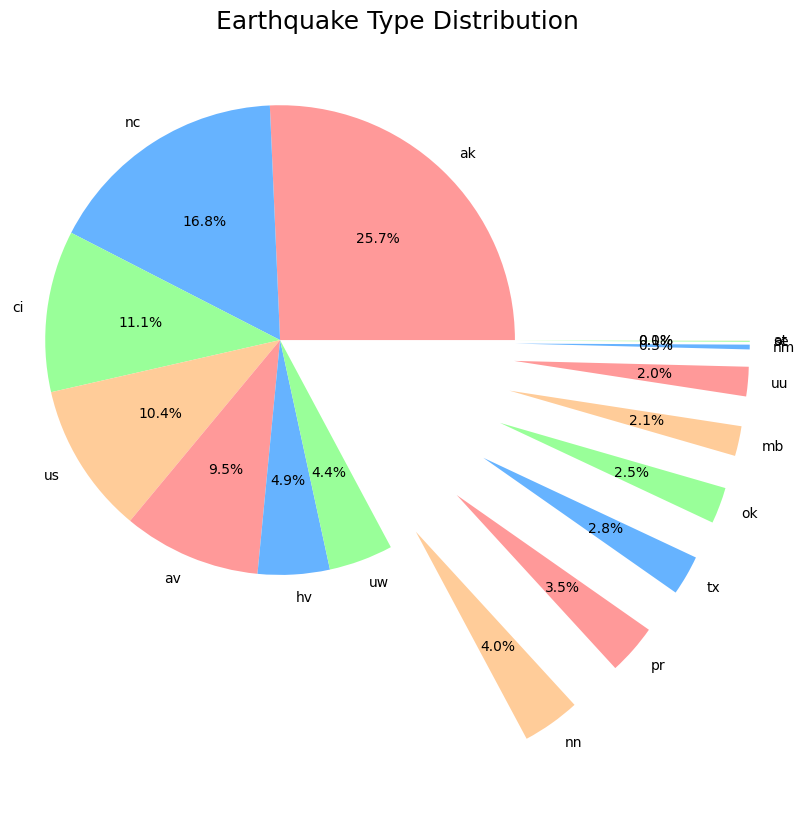

In [22]:
## Pie Chart
# Sample colors for the pie chart
colors = ["#ff9999", "#66b3ff", "#99ff99", "#ffcc99"]
# Calculate the value counts for 'net' column
net_counts = New_data_set['net'].value_counts()
plt.figure(figsize=(10, 10))
# Define explode based on a condition 
explode = [1 if count / net_counts.sum() < 0.04 else 0 for count in net_counts]
plt.pie(net_counts, autopct='%1.1f%%', labels=net_counts.index, colors=colors, startangle=0, explode=explode)
plt.title("Earthquake Type Distribution", loc="center", fontsize=18)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

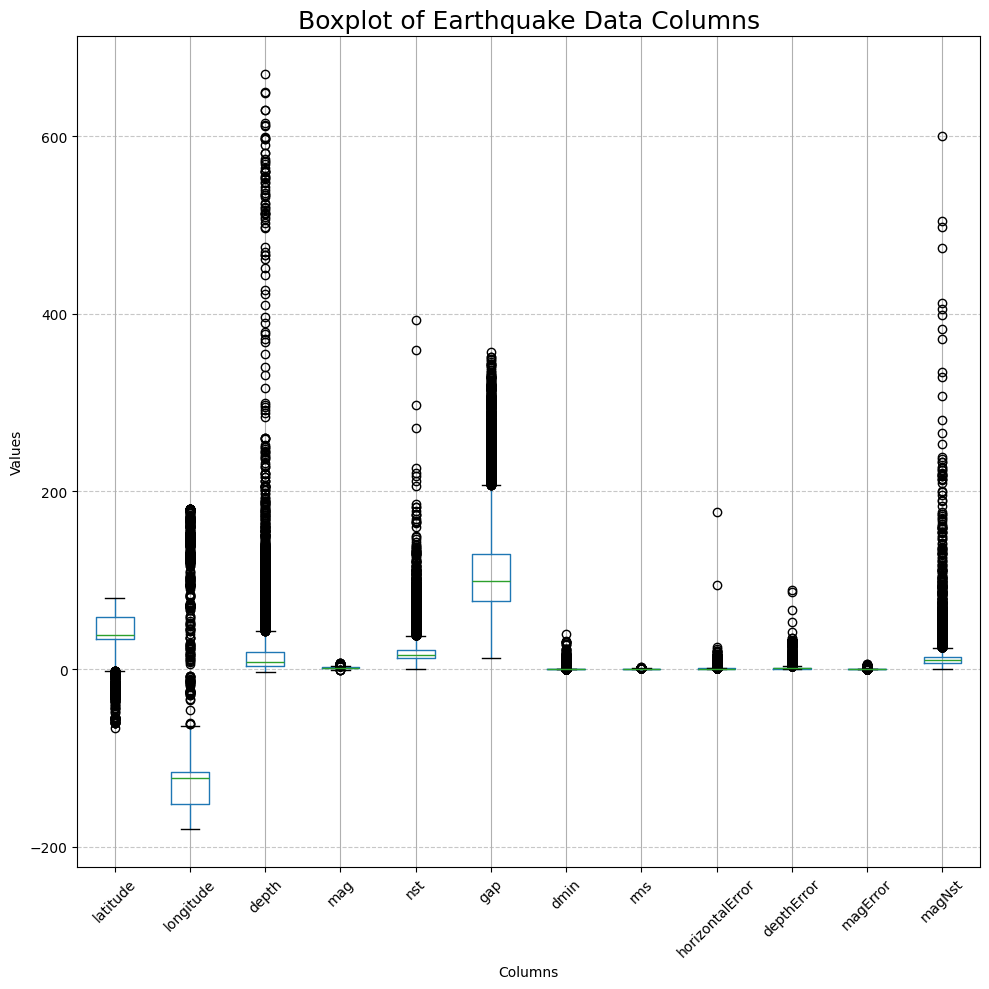

In [23]:
# Boxplot for all columns 
plt.figure(figsize=(10, 10))
New_data_set.boxplot(rot=45)  # Rotating x-axis labels for better visibility
plt.title('Boxplot of Earthquake Data Columns', loc="center", fontsize=18)
plt.xlabel('Columns')
plt.ylabel('Values')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

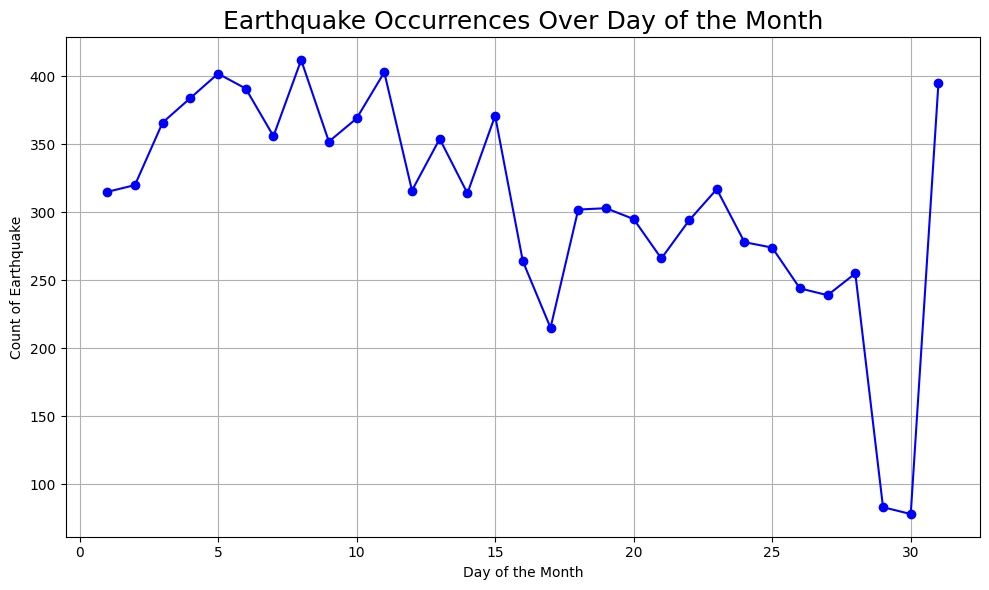

In [30]:
##Line Chart
# Convert the 'time' column to a datetime format using .loc
New_data_set.loc[:, 'time'] = pd.to_datetime(New_data_set['time'])

# Extract the day from the 'time' column using .loc
New_data_set.loc[:, 'day'] = New_data_set['time'].dt.day

# Group the data by day and count the occurrences in each day, then sort by day
counts = New_data_set['day'].value_counts().sort_index()

# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(counts.index, counts.values, marker='o', color='blue', linestyle='-')

# Set the title and adjust its position
plt.title('Earthquake Occurrences Over Day of the Month', fontsize=18)

# Label for the x-axis
plt.xlabel('Day of the Month')

# Label for the y-axis
plt.ylabel('Count of Earthquake')

# Enable the grid
plt.grid(True)

# Adjust layout to prevent labels from getting cut off
plt.tight_layout()

# Display the plot
plt.show()